# Fruit 360: Image Recognition of Fruits

-----

DECISION 546Q Final Project

Section B Team 18

Yinan Chen, Tirth Pravin Gala, Yuhe (Tiffany) Jin, Chenjie (Angelina) Sun

## Data Preparations

- First, we read the dataset and create directory path for training set and test set.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/fruits-360.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_contents')

In [3]:
training_dir = '/content/extracted_contents/fruits-360/Training'
validation_dir = '/content/extracted_contents/fruits-360/Test'

- Then, we perform data augmentation for training set and test set to enhance the model's ability to generalize to various inputs.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=False)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
batch_size = 32

In [6]:
training_generator = training_datagen.flow_from_directory(training_dir,
                                                          target_size = [100, 100],
                                                          batch_size = 32,
                                                          class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = [100, 100],
                                                              batch_size = 32,
                                                              class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


---
## CNN Models



In [10]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

Model 1

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(131, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(training_generator,
                    steps_per_epoch = len(training_generator) // batch_size,
                    epochs=50,
                    validation_data=validation_generator)

Model 2

In [7]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=(100, 100, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(131, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

In [ ]:
history2 = model2.fit(training_generator,
                    steps_per_epoch = len(training_generator) // batch_size,
                    epochs=50,
                    validation_data=validation_generator)

## Visualization

In [13]:
import matplotlib.pyplot as plt

For Model 1

- Train-Validation Loss

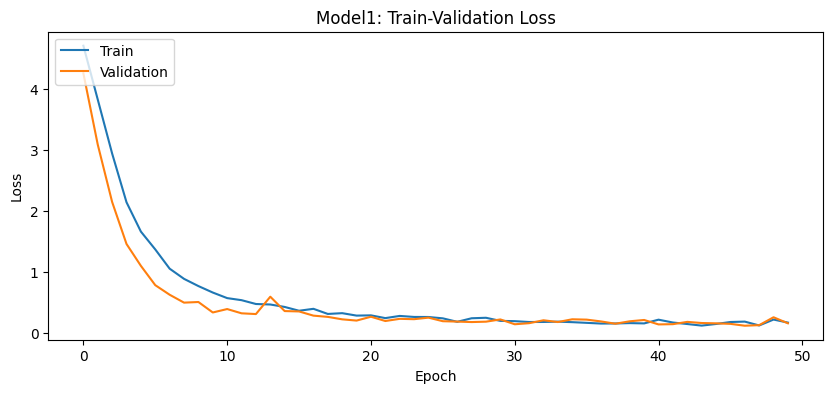

In [14]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title('Model1: Train-Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc= 'upper left')
plt.show()

- Train-Validation Accuracy

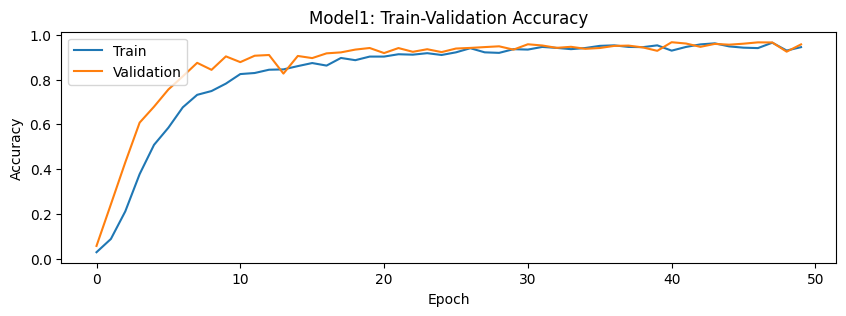

In [15]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'], label = "Train Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title('Model1: Train-Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

For Model 2

- Train-Validation Loss

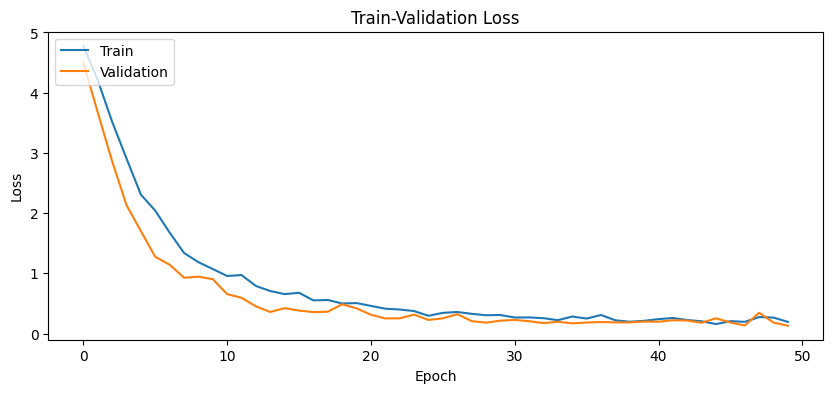

In [15]:
plt.figure(figsize=(10,4))
plt.plot(history2.history['loss'], label = "Train Loss")
plt.plot(history2.history['val_loss'], label = "Validation Loss")
plt.title('Train-Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc= 'upper left')
plt.show()

- Train-Validation Accuracy

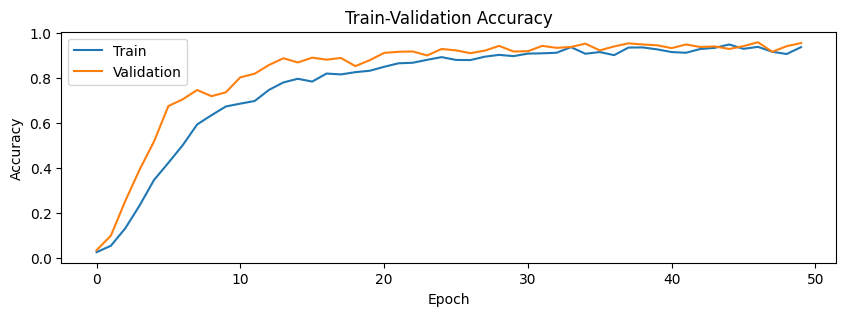

In [16]:
plt.figure(figsize=(10,3))
plt.plot(history2.history['accuracy'], label = "Train Accuracy")
plt.plot(history2.history['val_accuracy'], label = "Validation Accuracy")
plt.title('Train-Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

First, we take a look at loss & accuracy for 3 models.

In [16]:
result1 = model.evaluate(validation_generator)

709/709 [==============================] - 147s 206ms/step - loss: 0.1533 - accuracy: 0.9574


In [125]:
result2 = model2.evaluate(validation_generator)

709/709 [==============================] - 266s 375ms/step - loss: 0.1094 - accuracy: 0.9658


In [17]:
print(f'Model1')
print(f'Loss: {result1[0]}, Accuracy: {result1[1]}')

Model1
Loss: 0.1532953679561615, Accuracy: 0.9574224352836609


In [126]:
print(f'Model2')
print(f'Loss: {result2[0]}, Accuracy: {result2[1]}')

Model2
Loss: 0.10939820855855942, Accuracy: 0.9657528400421143


From loss & accuracy, we find that Model 2 is the best one with the lowest loss and highest accuracy among all.

Then, we predict the fruit image based on Model 2 to see whether it's consistent with the actual fruit.

In [136]:
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder

1/1 [==============================] - 1s 569ms/step


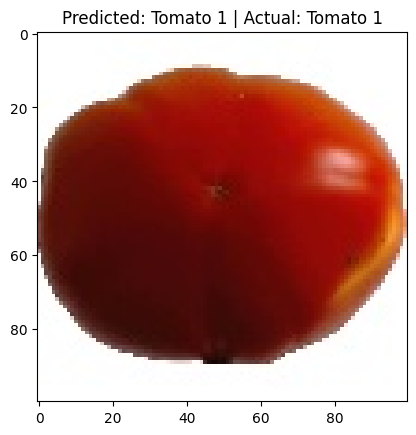

In [135]:
class_names = os.listdir('/content/extracted_contents/fruits-360/Test')

le = LabelEncoder()
le.fit(class_names)
class_labels = le.transform(class_names)

images, labels = next(validation_generator)
actual_class_idx = np.argmax(labels, axis=1)[0]

predictions = model2.predict(images)
predicted_class_idx = np.argmax(predictions, axis=1)[0]

predicted_class_name = class_names[predicted_class_idx]
actual_class_name = class_names[np.argmax(labels, axis=1)[0]]

plt.imshow(images[0])
plt.title(f"Predicted: {predicted_class_name} | Actual: {actual_class_name}")
plt.show()